# Limitations of additive noise models in the linear Gaussian case

In this notebook, we illustrate the limitation of **Additive Noise Model (ANM)** for causal discovery in the linear Gaussian case. In this case, we lose the asymettry between $X$ and $Y$ and ANM fails to detect the true causal structure  

We generate data according to the model

$$
Y = 0.5 \cdot X + N_Y,
$$

where:
- $X$ is the cause,
- $N_Y$ is an independent noise term.
- Both $X$ and $N_Y$ are Gaussian.
- 
We then:
1. Fit linear regressions in the causal and anti-causal directions,
2. Compute residuals,
3. Test independence using the **Hilbert–Schmidt Independence Criterion (HSIC)**.


## 1. Import required libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import LinearRegression
from hyppo.independence import Hsic


## 2. Data generation

We simulate data from the additive noise model

$$
Y = 0.5 \cdot X + N_Y,
$$

where both $X$ and $N_Y$ are independent, $X \sim \mathcal{N}(2 , 1)$ and $N_Y \sim \mathcal{N}(0 , 0.3^2)$.


In [2]:
# Parameters
n = 1000

# Fix seed for reproducibility
random.seed(7)
np.random.seed(7)

# Generate cause and noise
X = np.random.normal(2 , 1 , n)
N_Y = np.random.normal(0 , 0.3 ,  n)

# Generate effect
Y = 0.5 * X + N_Y


## 3. Causal direction: $X \rightarrow Y $

We regress $Y$ on $X$, which corresponds to the **true causal direction**.

If the additive noise model is correct, the residuals should be **independent of $X$**.


In [3]:
# Fit linear regression Y ~ X
causal_model = LinearRegression()
causal_model.fit(X.reshape(-1, 1), Y)

# Predicted values and residuals
Y_hat = causal_model.predict(X.reshape(-1, 1))
residual_causal = Y_hat - Y


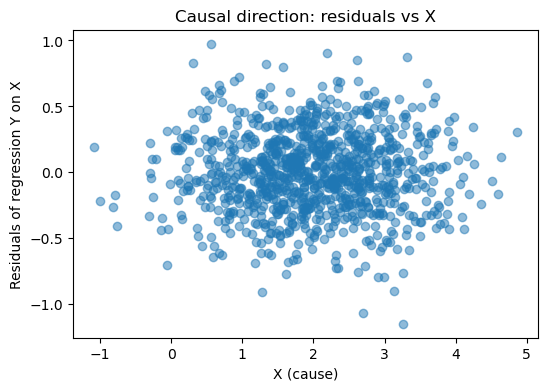

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(X, residual_causal, alpha=0.5)
plt.xlabel("X (cause)")
plt.ylabel("Residuals of regression Y on X")
plt.title("Causal direction: residuals vs X")
plt.show()


### HSIC independence test (causal direction)

To test whether two samples $U$ and $V$ are independent, you can use the **Hilbert--Schmidt Independence Criterion (HSIC) test**; see Gretton, A., K. Fukumizu, C. H. Teo, L. Song, B. Scholkopf and A. J. Smola (2007). A kernel statistical test of independence. In Advances in Neural Information Processing Systems (pp. 585-592).

This test considers the hypotheses
$$
H_0 : U \!\perp\!\!\!\perp V, \qquad
H_1 : U \not\!\perp\!\!\!\perp V.
$$




In [5]:
hsic_test = Hsic()
stat_causal, pvalue_causal = hsic_test.test(X, residual_causal)

print("HSIC statistic (causal):", stat_causal)
print("p-value (causal):", pvalue_causal)

print(
  "This is the p-value for testing X independent of the residuals of Y on X:",
  pvalue_causal,
  ". Since this p-value is larger than 0.05, we keep the null hypothesis H_0 of independence."
)


HSIC statistic (causal): -0.0009858693933866933
p-value (causal): 0.9053765844901625
This is the p-value for testing X independent of the residuals of Y on X: 0.9053765844901625 . Since this p-value is larger than 0.05, we keep the null hypothesis H_0 of independence.


## 4. Anti-causal direction: $Y \rightarrow X$

We now regress $X$ on $Y$, which corresponds to the **wrong causal direction**.

In general, we expect that the residuals will **not** be independent of $Y$.


In [6]:
# Fit linear regression X ~ Y
anticausal_model = LinearRegression()
anticausal_model.fit(Y.reshape(-1, 1), X)

# Predicted values and residuals
X_hat = anticausal_model.predict(Y.reshape(-1, 1))
residual_anticausal = X_hat - X


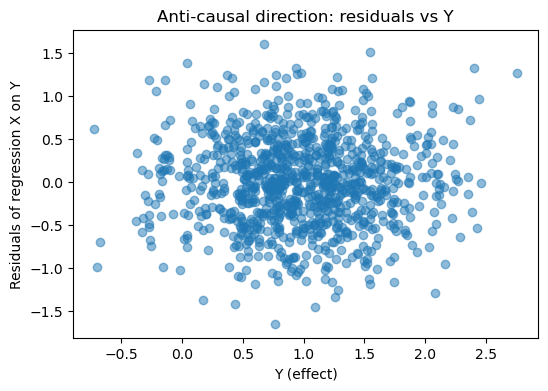

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(Y, residual_anticausal, alpha=0.5)
plt.xlabel("Y (effect)")
plt.ylabel("Residuals of regression X on Y")
plt.title("Anti-causal direction: residuals vs Y")
plt.show()


However, from the plot, we can not see any pattern of dependence between the residuals and $Y$ 

### HSIC independence test (anti-causal direction)

We test whether the residuals are independent of $Y$.


In [9]:
hsic_test = Hsic()
stat_anti, pvalue_anti = hsic_test.test(Y, residual_anticausal)

print("HSIC statistic (anti-causal):", stat_anti)
print("p-value (anti-causal):", pvalue_anti)

print(
  "This is the p-value for testing Y independent of the residuals of X on Y:",
  pvalue_anti,
  ". Since this p-value is larger than 0.05, we keep the null hypothesis H_0 of independence."
)


HSIC statistic (anti-causal): -0.001475662574140571
p-value (anti-causal): 1.0
This is the p-value for testing Y independent of the residuals of X on Y: 1.0 . Since this p-value is larger than 0.05, we keep the null hypothesis H_0 of independence.


## 5. Conclusion

For **linear Gaussian additive noise models**, the ANM approach fails to identify the true causal direction. 
In this setting, the joint distribution $(X, Y)$ is **bivariate Gaussian**, which implies that the model is symmetric with respect to $X$ and $Y$. 
As a consequence, the asymmetry exploited by additive noise models to infer causality disappears, and the causal direction cannot be distinguished from observational data alone.
